In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tqdm import tqdm
from scipy.stats import gaussian_kde
import plotly.express as px
import os
import cv2
import warnings

warnings.filterwarnings('ignore')

In [38]:
df=pd.read_csv('../data/raw/gloss_counts.csv')
df.head()

,gloss,count
0,erase,166
1,drown,165
2,shave,165
3,pineapple,159
4,envelope,159


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296 entries, 0 to 2295
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gloss   2296 non-null   object
 1   count   2296 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 36.0+ KB


In [40]:
df.describe()

,count
count,2296.000000
mean,38.216028
std,17.868204
min,29.000000
25%,31.000000
50%,32.000000
75%,34.000000
max,166.000000


In [41]:
# Basic info
print("Total glosses:", df.shape[0])
print("Total samples:", df['count'].sum())

Total glosses: 2296
Total samples: 87744


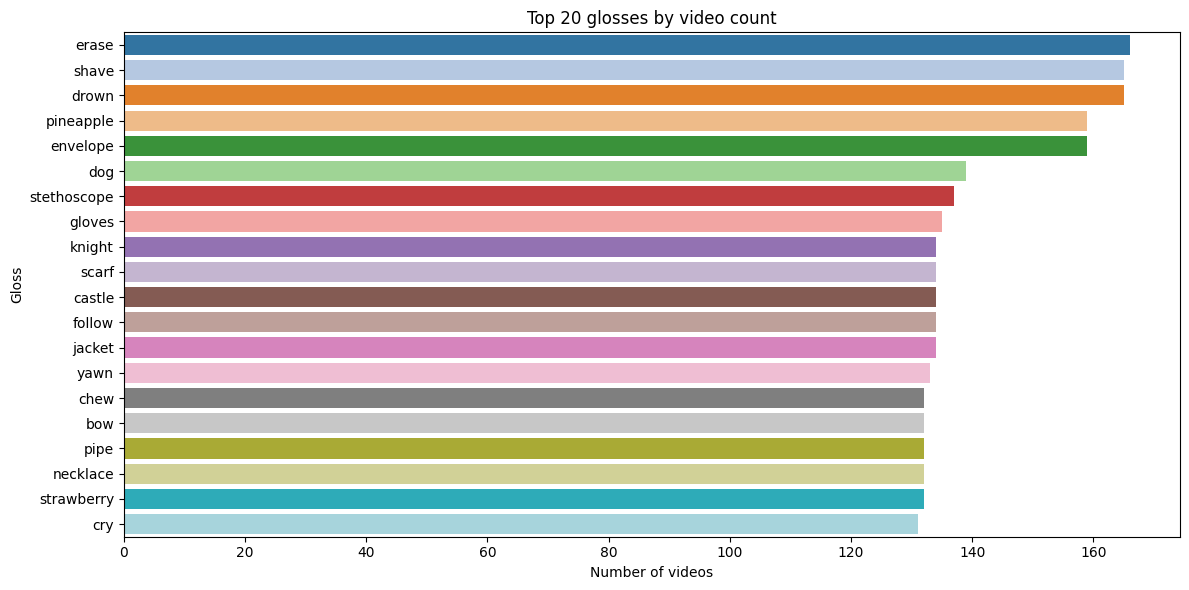

In [42]:
# ===== 1. Top 20 glosses =====
top_n = 20
plt.figure(figsize=(12,6))
sns.barplot(x='count', y='gloss', data=df.sort_values('count', ascending=False).head(top_n), palette='tab20')
plt.title(f"Top {top_n} glosses by video count")
plt.xlabel("Number of videos")
plt.ylabel("Gloss")
plt.tight_layout()
plt.show()

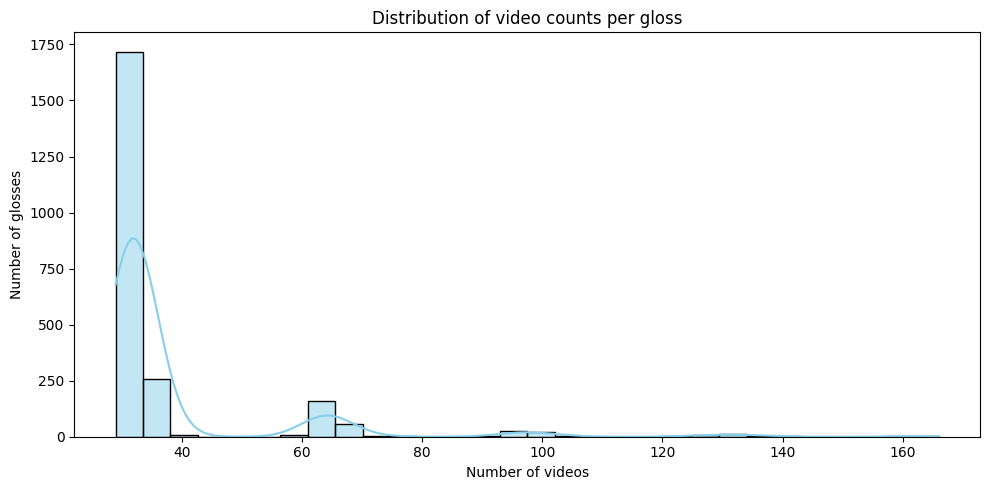

In [43]:
# ===== 2. Distribution of counts =====
plt.figure(figsize=(10,5))
sns.histplot(df['count'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of video counts per gloss")
plt.xlabel("Number of videos")
plt.ylabel("Number of glosses")
plt.tight_layout()
plt.show()

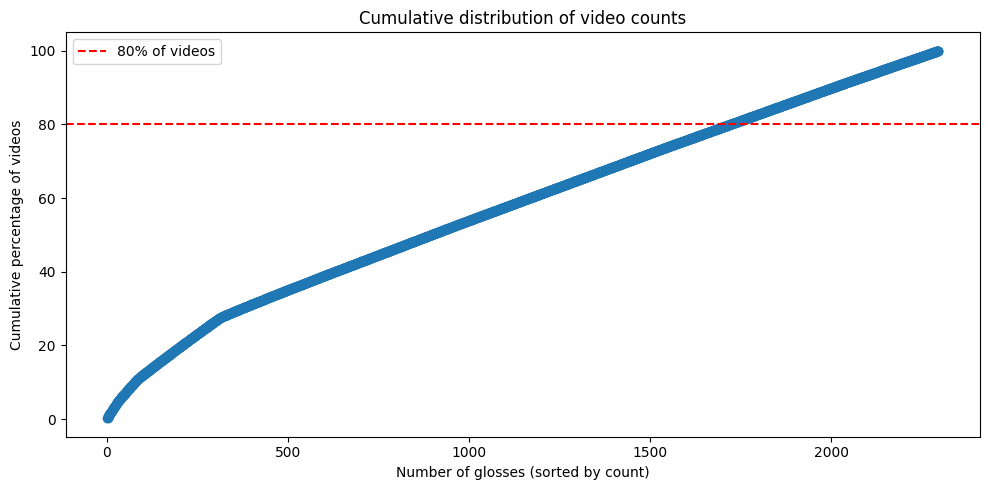

In [44]:
# ===== 3. Cumulative distribution =====
#If the curve rises fast → dataset is skewed, you may need balancing or augmentation.
#If the curve rises gradually → dataset is fairly balanced.
df_sorted = df.sort_values('count', ascending=False)
df_sorted['cumulative_sum'] = df_sorted['count'].cumsum()
df_sorted['cumulative_perc'] = df_sorted['cumulative_sum'] / df_sorted['count'].sum() * 100

plt.figure(figsize=(10,5))
plt.plot(range(1, len(df_sorted)+1), df_sorted['cumulative_perc'], marker='o', linestyle='-')
plt.axhline(80, color='red', linestyle='--', label='80% of videos')
plt.title("Cumulative distribution of video counts")
plt.xlabel("Number of glosses (sorted by count)")
plt.ylabel("Cumulative percentage of videos")
plt.legend()
plt.tight_layout()
plt.show()

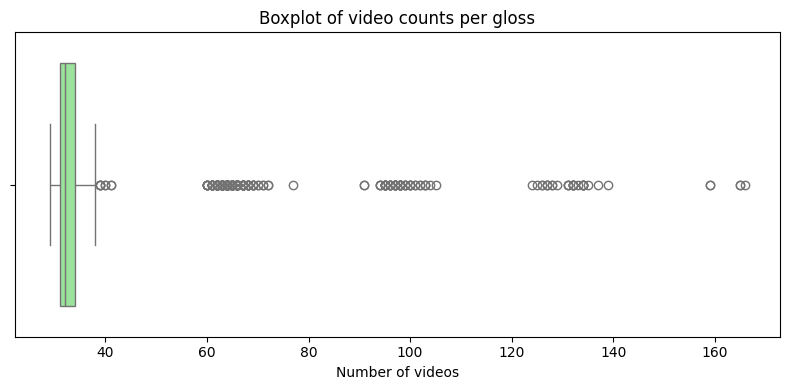

In [45]:
# ===== 4. Boxplot to detect outliers =====
plt.figure(figsize=(8,4))
sns.boxplot(x=df['count'], color='lightgreen')
plt.title("Boxplot of video counts per gloss")
plt.xlabel("Number of videos")
plt.tight_layout()
plt.show()

In [46]:
# ===== 5. Pareto: How many glosses cover 80% of videos =====
gloss_80pct = df_sorted[df_sorted['cumulative_perc'] <= 80].shape[0]
total_gloss = df.shape[0]
print(f"{gloss_80pct} glosses ({gloss_80pct/total_gloss*100:.2f}%) cover ~80% of all videos")

1720 glosses (74.91%) cover ~80% of all videos


In [47]:
# Sort by count descending
df_sorted = df.sort_values('count', ascending=False)

# Interactive bar chart
fig = px.bar(
    df_sorted,
    x='gloss',
    y='count',
    hover_data=['gloss', 'count'],
    color='count',  # color by count for extra visual info
    color_continuous_scale='Turbo',  # colorful gradient
    title="Interactive Gloss Counts",
    labels={'count':'Number of Videos', 'gloss':'Gloss'}
)

# Improve layout for many glosses
fig.update_layout(
    xaxis={'categoryorder':'total descending'},
    xaxis_tickangle=-45,
    height=600,
    width=1200
)

fig.show()

Found 83399 videos in E:\ASL_Citizen\videos


100%|██████████| 83399/83399 [10:19<00:00, 134.68it/s]


Basic Statistics:
  Total videos: 83399
  Min frames: 3
  Max frames: 680
  Mean frames: 82.8
  Median frames: 75.0
  Std dev: 37.7
  10th percentile: 47.0
  25th percentile: 58.0
  50th percentile: 75.0
  75th percentile: 96.0
  90th percentile: 130.0
  95th percentile: 158.0
  99th percentile: 211.0

Category Counts:
Very Short (1-30)      674
Short (31-60)        22920
Medium (61-120)      49410
Long (121-200)        9356
Very Long (201+)      1039
Name: count, dtype: int64

Number of outliers: 4830
Outlier video examples: ['0002752583837435374-DISCUSS.mp4' '0005105598398187361-SAIL 2.mp4'
 '000926159240660196-SCREWDRIVER 3.mp4'
 '0009570133052014818-GO BACK_AND_FORTH.mp4'
 '0011363433983022642-BATH.mp4' '0011983342543988584-BABY.mp4'
 '0014781815738396098-CEILING.mp4' '001531801362371743-YELLOW.mp4'
 '0019294582659865611-QUALITY.mp4' '002689623455891077-GO THROUGH.mp4']


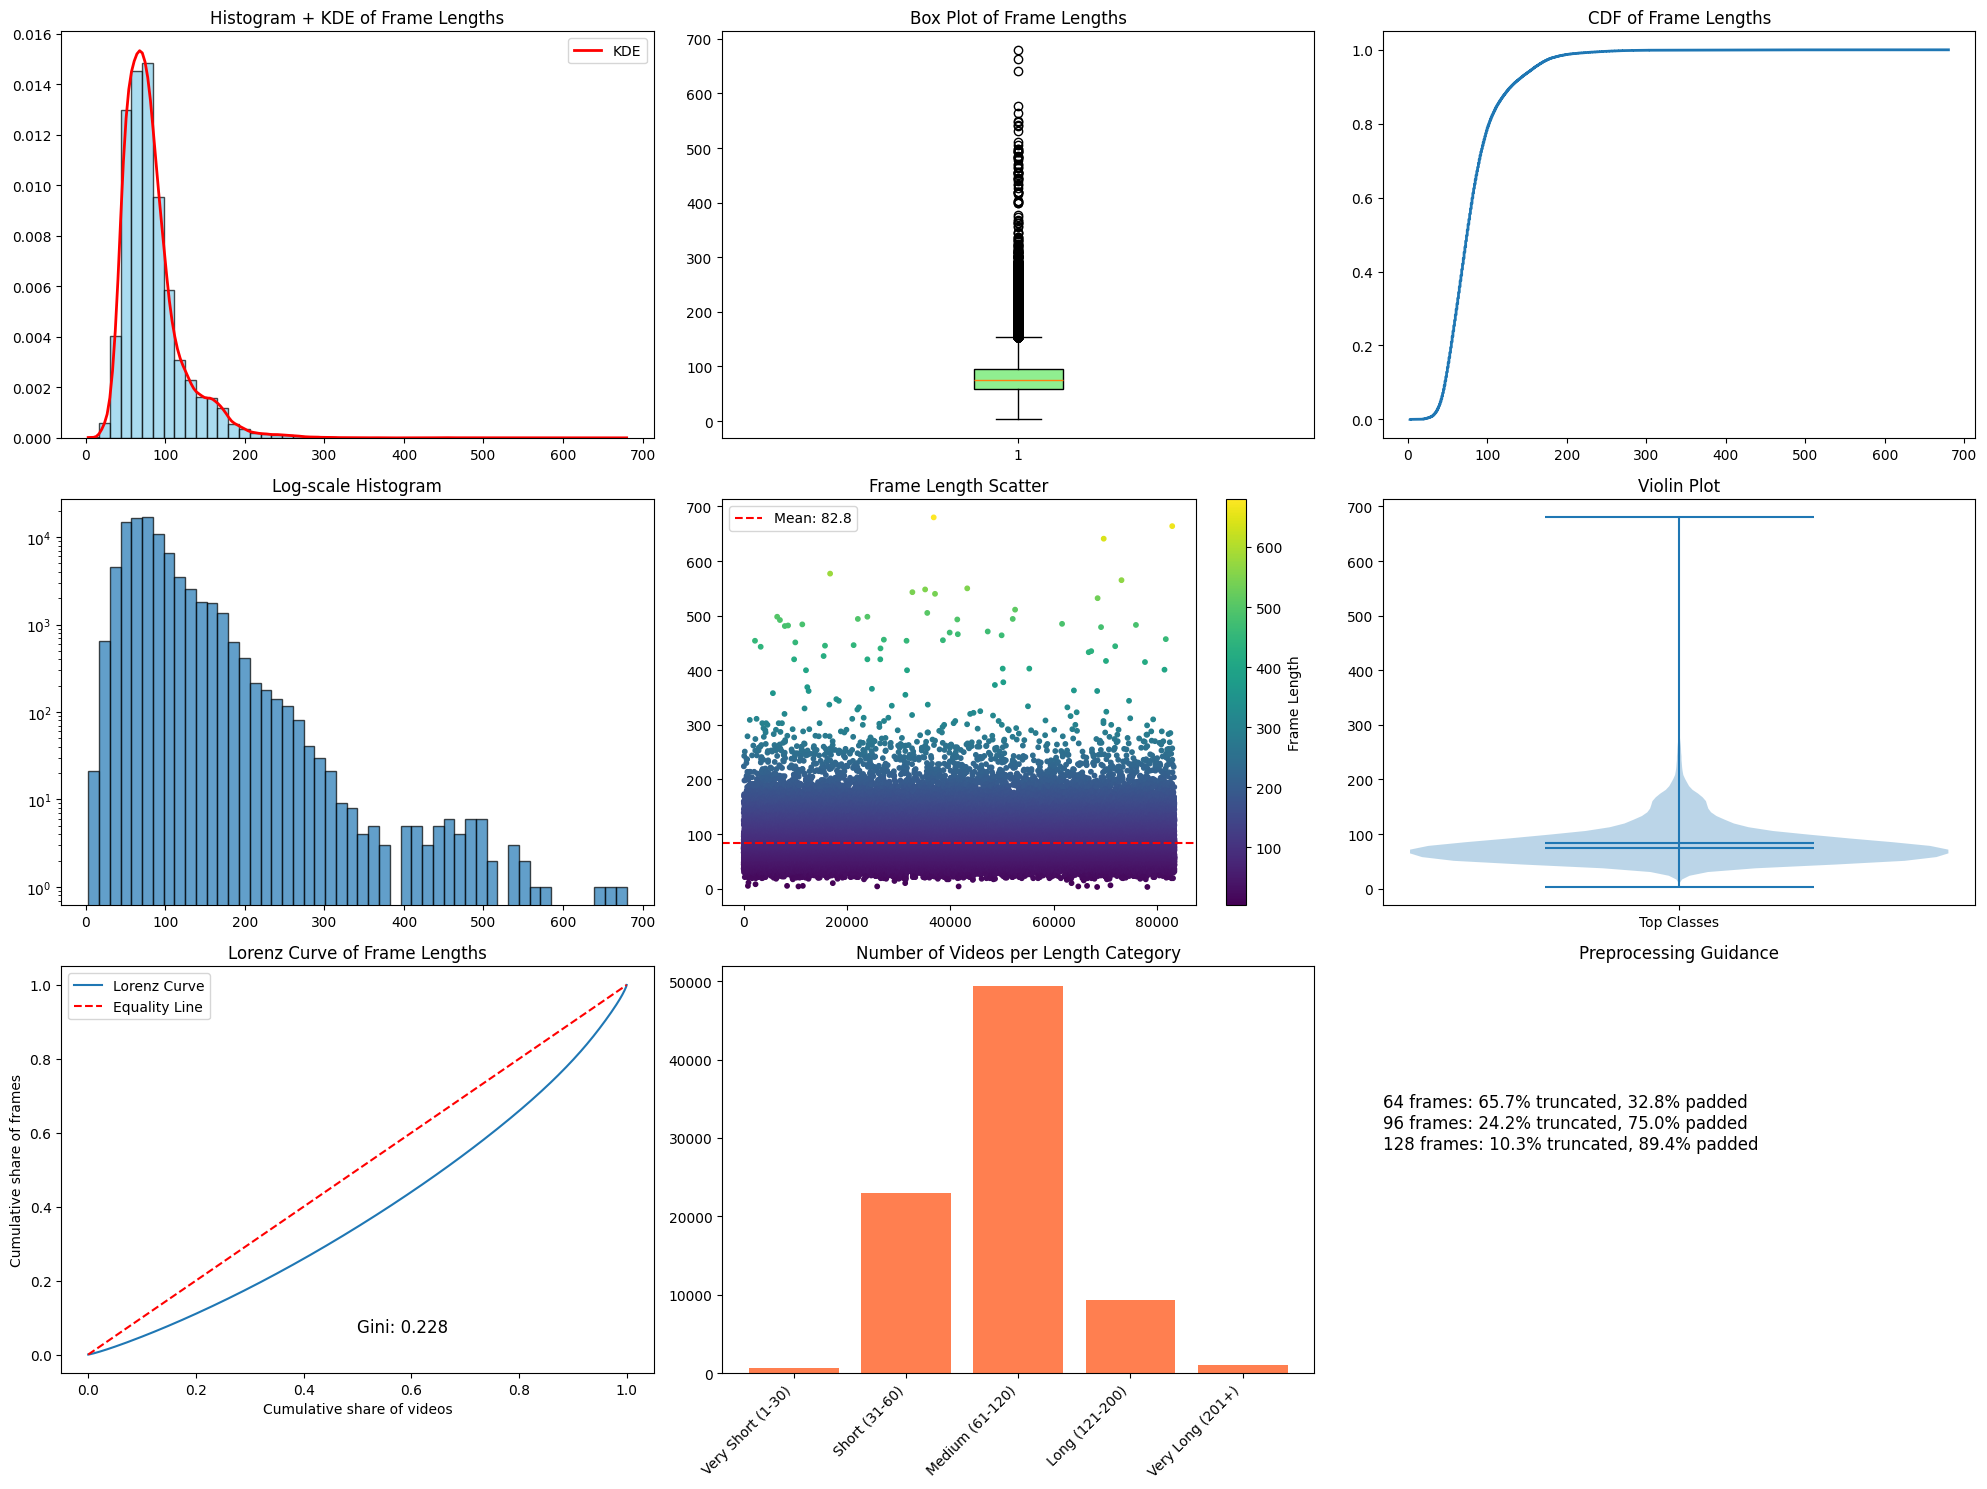

{'total_videos': 83399,
 'mean_length': 82.75558459933572,
 'median_length': 75.0,
 'min_length': 3,
 'max_length': 680,
 'std_length': 37.68721964719847,
 'percentiles': {10: 47.0,
  25: 58.0,
  50: 75.0,
  75: 96.0,
  90: 130.0,
  95: 158.0,
  99: 211.0},
 'Gini': 0.227616759672559,
 'category_counts': {'Very Short (1-30)': 674,
  'Short (31-60)': 22920,
  'Medium (61-120)': 49410,
  'Long (121-200)': 9356,
  'Very Long (201+)': 1039},
 'outliers': ['0002752583837435374-DISCUSS.mp4',
  '0005105598398187361-SAIL 2.mp4',
  '000926159240660196-SCREWDRIVER 3.mp4',
  '0009570133052014818-GO BACK_AND_FORTH.mp4',
  '0011363433983022642-BATH.mp4',
  '0011983342543988584-BABY.mp4',
  '0014781815738396098-CEILING.mp4',
  '001531801362371743-YELLOW.mp4',
  '0019294582659865611-QUALITY.mp4',
  '002689623455891077-GO THROUGH.mp4',
  '0028368024574920714-POPE.mp4',
  '0031442380049648833-SEQUENCE.mp4',
  '003246430984927162-VANILLA.mp4',
  '004367194488498649-GARLIC.mp4',
  '004506677802354142-CAM

In [48]:


# =========================
# CONFIG
# =========================
VIDEO_DIR = r"E:\ASL_Citizen\videos"

# =========================
# 1️⃣ Collect frame lengths
# =========================
def collect_frame_lengths(video_dir):
    video_files = list(Path(video_dir).glob("*.mp4"))
    frame_lengths = []
    file_names = []

    if len(video_files) == 0:
        raise ValueError(f"No .mp4 videos found in {video_dir}")

    print(f"Found {len(video_files)} videos in {video_dir}")

    for vf in tqdm(video_files):
        cap = cv2.VideoCapture(str(vf))
        if not cap.isOpened():
            print(f"⚠️ Failed to open video: {vf.name}")
            continue
        length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        if length > 0:
            frame_lengths.append(length)
            file_names.append(vf.name)
        else:
            print(f"⚠️ Video has zero frames: {vf.name}")
        cap.release()

    if len(frame_lengths) == 0:
        raise ValueError("No videos could be read successfully!")

    return np.array(frame_lengths), file_names

# =========================
# 2️⃣ Categorize lengths
# =========================
def categorize_lengths(frame_lengths):
    bins = [0,30,60,120,200,np.inf]
    labels = ["Very Short (1-30)","Short (31-60)","Medium (61-120)","Long (121-200)","Very Long (201+)"]
    categories = pd.cut(frame_lengths, bins=bins, labels=labels)
    return categories

# =========================
# 3️⃣ Lorenz curve & Gini
# =========================
def lorenz_curve(values, ax=None):
    sorted_vals = np.sort(values)
    cumvals = np.cumsum(sorted_vals)
    cumvals = cumvals / cumvals[-1]
    xvals = np.linspace(0,1,len(values))
    if ax is None:
        fig, ax = plt.subplots()
    ax.plot(np.append([0], xvals), np.append([0], cumvals), label="Lorenz Curve")
    ax.plot([0,1],[0,1], linestyle="--", color="red", label="Equality Line")
    ax.set_xlabel("Cumulative share of videos")
    ax.set_ylabel("Cumulative share of frames")
    ax.set_title("Lorenz Curve of Frame Lengths")
    ax.legend()
    B = np.trapz(cumvals, xvals)
    Gini = 1 - 2*B
    return Gini

# =========================
# 4️⃣ Analysis & plotting (in-memory only)
# =========================
def analyze_and_plot(frame_lengths, file_names):
    # Basic stats
    print("Basic Statistics:")
    print(f"  Total videos: {len(frame_lengths)}")
    print(f"  Min frames: {frame_lengths.min()}")
    print(f"  Max frames: {frame_lengths.max()}")
    print(f"  Mean frames: {frame_lengths.mean():.1f}")
    print(f"  Median frames: {np.median(frame_lengths):.1f}")
    print(f"  Std dev: {frame_lengths.std():.1f}")
    for p in [10,25,50,75,90,95,99]:
        print(f"  {p}th percentile: {np.percentile(frame_lengths,p):.1f}")

    # Categorize
    categories = categorize_lengths(frame_lengths)
    category_counts = categories.value_counts().sort_index()
    print("\nCategory Counts:")
    print(category_counts)

    # Outliers
    Q1 = np.percentile(frame_lengths, 25)
    Q3 = np.percentile(frame_lengths, 75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = np.array(file_names)[(frame_lengths<lower) | (frame_lengths>upper)]
    print(f"\nNumber of outliers: {len(outliers)}")
    if len(outliers)>0:
        print("Outlier video examples:", outliers[:10])

    # Plotting
    fig, axes = plt.subplots(3,3, figsize=(20,15))
    axes = axes.flatten()

    # Histogram + KDE
    axes[0].hist(frame_lengths, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    kde = gaussian_kde(frame_lengths)
    x_vals = np.linspace(frame_lengths.min(), frame_lengths.max(), 200)
    axes[0].plot(x_vals, kde(x_vals), color='red', lw=2, label='KDE')
    axes[0].set_title("Histogram + KDE of Frame Lengths")
    axes[0].legend()

    # Box plot
    axes[1].boxplot(frame_lengths, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
    axes[1].set_title("Box Plot of Frame Lengths")

    # CDF
    sorted_lengths = np.sort(frame_lengths)
    cdf = np.arange(1,len(sorted_lengths)+1)/len(sorted_lengths)
    axes[2].plot(sorted_lengths, cdf, linewidth=2)
    axes[2].set_title("CDF of Frame Lengths")

    # Log-scale histogram
    axes[3].hist(frame_lengths, bins=50, edgecolor='black', alpha=0.7, log=True)
    axes[3].set_title("Log-scale Histogram")

    # Scatter
    sc = axes[4].scatter(range(len(frame_lengths)), frame_lengths, c=frame_lengths, cmap='viridis', s=10)
    axes[4].axhline(frame_lengths.mean(), color='red', linestyle='--', label=f'Mean: {frame_lengths.mean():.1f}')
    axes[4].set_title("Frame Length Scatter")
    axes[4].legend()
    plt.colorbar(sc, ax=axes[4], label='Frame Length')

    # Violin plot
    parts = axes[5].violinplot([frame_lengths], showmeans=True, showmedians=True)
    axes[5].set_xticks([1])
    axes[5].set_xticklabels(['Top Classes'])
    axes[5].set_title("Violin Plot")

    # Lorenz curve
    Gini = lorenz_curve(frame_lengths, axes[6])
    axes[6].text(0.5,0.1,f"Gini: {Gini:.3f}",transform=axes[6].transAxes, fontsize=12)

    # Category bar chart
    axes[7].bar(category_counts.index.astype(str), category_counts.values, color='coral')
    axes[7].set_title("Number of Videos per Length Category")
    axes[7].set_xticklabels(category_counts.index, rotation=45, ha="right")

    # Percent truncated/padded at standard targets
    targets = [64,96,128]
    pct_text = ""
    for t in targets:
        truncated = np.mean(frame_lengths>t)*100
        padded = np.mean(frame_lengths<t)*100
        pct_text += f"{t} frames: {truncated:.1f}% truncated, {padded:.1f}% padded\n"
    axes[8].axis('off')
    axes[8].text(0,0.5,pct_text, fontsize=12)
    axes[8].set_title("Preprocessing Guidance")

    plt.tight_layout()
    plt.show()

    # Return DataFrames and summary dict instead of saving
    df_report = pd.DataFrame({
        "Video": file_names,
        "Frame_Length": frame_lengths,
        "Category": categories
    })
    summary = {
        "total_videos": len(frame_lengths),
        "mean_length": float(frame_lengths.mean()),
        "median_length": float(np.median(frame_lengths)),
        "min_length": int(frame_lengths.min()),
        "max_length": int(frame_lengths.max()),
        "std_length": float(frame_lengths.std()),
        "percentiles": {p: float(np.percentile(frame_lengths,p)) for p in [10,25,50,75,90,95,99]},
        "Gini": float(Gini),
        "category_counts": category_counts.to_dict(),
        "outliers": outliers.tolist()
    }

    return df_report, summary

# =========================
# MAIN
# =========================
frame_lengths, file_names = collect_frame_lengths(VIDEO_DIR)
df_report, summary = analyze_and_plot(frame_lengths, file_names)

# Inspect in notebook
df_report.head()
summary

In [49]:
frame_lengths = df_report["Frame_Length"].values

# Compute key statistics
median_len = int(np.median(frame_lengths))
p95_len = int(np.percentile(frame_lengths, 95))
p99_len = int(np.percentile(frame_lengths, 99))

# The most suitable length: 95th percentile
suitable_length = p95_len

print("📊 Recommended target frame length for preprocessing (your dataset):")
print(f" - Most suitable: {suitable_length} frames (≈95% of videos fit fully)")
print(f" - Median: {median_len} frames (for balanced padding/truncation)")
print(f" - 99th percentile: {p99_len} frames (for almost all videos)")

# Optional: show truncation/padding if using this target
trunc_rate = np.mean(frame_lengths > suitable_length) * 100
pad_rate = np.mean(frame_lengths < suitable_length) * 100

print(f"\n💡 Using {suitable_length} frames:")
print(f" - Videos to truncate: {trunc_rate:.1f}%")
print(f" - Videos to pad: {pad_rate:.1f}%")

📊 Recommended target frame length for preprocessing (your dataset):
 - Most suitable: 158 frames (≈95% of videos fit fully)
 - Median: 75 frames (for balanced padding/truncation)
 - 99th percentile: 211 frames (for almost all videos)

💡 Using 158 frames:
 - Videos to truncate: 5.0%
 - Videos to pad: 94.9%
